In [1]:
import staintools
%matplotlib inline

In [2]:
# Method should be 'macenko' or 'vahadane'
stain_normalizer = staintools.StainNormalizer(method='vahadane')

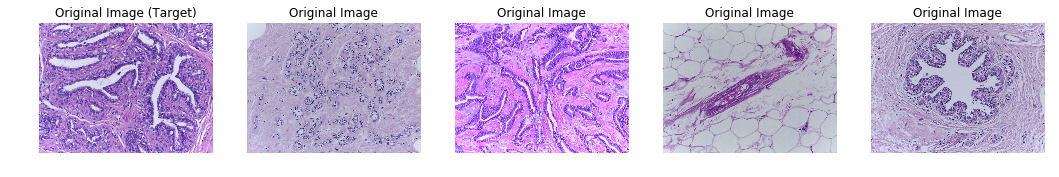

In [3]:
i1 = staintools.read_image("./data/i1.png")
i2 = staintools.read_image("./data/i2.png")
i3 = staintools.read_image("./data/i3.png")
i4 = staintools.read_image("./data/i4.png")
i5 = staintools.read_image("./data/i5.png")

# Lets view the images
stack = staintools.make_image_stack([i1, i2, i3, i4, i5])
titles = ["Original Image (Target)"] + ["Original Image"] * 4
staintools.plot_image_stack(stack, width=5, title_list=titles)

# With Brightness Standardization

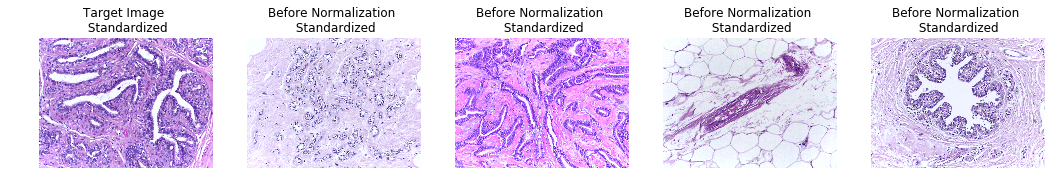

In [4]:
standardizer = staintools.BrightnessStandardizer()

i1_standard = standardizer.transform(i1)
i2_standard = standardizer.transform(i2)
i3_standard = standardizer.transform(i3)
i4_standard = standardizer.transform(i4)
i5_standard = standardizer.transform(i5)

# Lets view the images
stack = staintools.make_image_stack([i1_standard, i2_standard, i3_standard, i4_standard, i5_standard])
titles = ["Target Image \n Standardized"] + ["Before Normalization \n Standardized"] * 4
staintools.plot_image_stack(stack, width=5, title_list=titles)

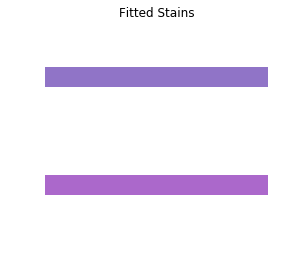

In [5]:
# Fit to image 1
stain_normalizer.fit(i1_standard)
staintools.plot_row_colors(stain_normalizer.stain_matrix_target_RGB, fig_size=4, title='Fitted Stains')

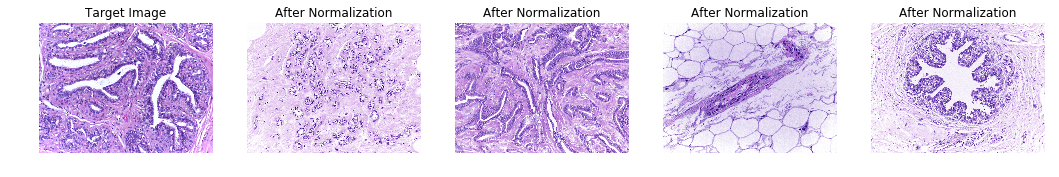

In [6]:
# Transform others
i2_standard_normalized = stain_normalizer.transform(i2_standard)
i3_standard_normalized = stain_normalizer.transform(i3_standard)
i4_standard_normalized = stain_normalizer.transform(i4_standard)
i5_standard_normalized = stain_normalizer.transform(i5_standard)

# Plot
stack = staintools.make_image_stack([i1_standard, i2_standard_normalized, i3_standard_normalized,
                                     i4_standard_normalized, i5_standard_normalized])
titles = ["Target Image"] + ["After Normalization"] * 4
staintools.plot_image_stack(stack,width=5, title_list=titles)

# Without Brightness Standardization

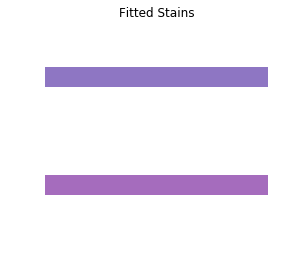

In [7]:
# Fit to image 1
stain_normalizer.fit(i1)
staintools.plot_row_colors(stain_normalizer.stain_matrix_target_RGB, fig_size=4, title='Fitted Stains')

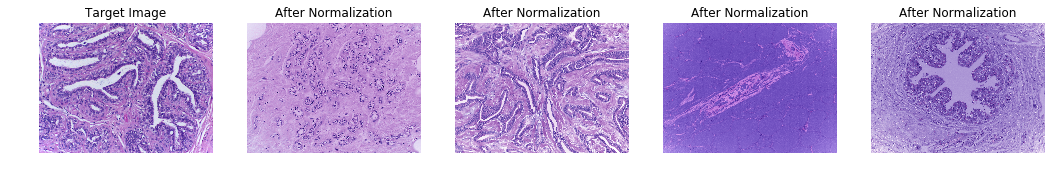

In [8]:
# Transform others
i2_normalized = stain_normalizer.transform(i2)
i3_normalized = stain_normalizer.transform(i3)
i4_normalized = stain_normalizer.transform(i4)
i5_normalized = stain_normalizer.transform(i5)

# Plot
stack = staintools.make_image_stack([i1, i2_normalized, i3_normalized,
                                     i4_normalized, i5_normalized])
titles = ["Target Image"] + ["After Normalization"] * 4
staintools.plot_image_stack(stack,width=5, title_list=titles)